<a href="https://colab.research.google.com/github/Madhushree2000/Image-segmentation/blob/main/Grab_Cut_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###GrabCut Algorithm

GrabCut is an image-segmentation algorithm for foreground extraction with minimal user interaction. It was designed by Carsten Rother, Vladimir Kolmogorov & Andrew Blake from Microsoft Research Cambridge, UK. 

**Background Working:**

1.   User inputs the rectangle. Everything outside this rectangle will be taken as sure background. Everything inside rectangle is unknown.

2.   Computer performs an initial labelling depeding on the data.

3.   A Gaussian Mixture Model(GMM) is used to model the foreground and background. That is, the unknown pixels are labelled either probable foreground or probable background depending on its relation with the other hard-labelled pixels in terms of color statistics.

4.  A graph is built from this pixel distribution. Nodes in the graphs are pixels. Additional two nodes are added, Source node and Sink node. 

5.  The weights of edges connecting pixels to source node/end node are defined by the probability of a pixel being foreground/background. The weights between the pixels are defined by the edge information or pixel similarity.

6.  Then a mincut algorithm is used to segment the graph. It cuts the graph into two separating source node and sink node with minimum cost function. The cost function is the sum of all weights of the edges that are cut.

7. After the cut, all the pixels connected to Source node become foreground and those connected to Sink node become background.

8.  The process is continued until the classification converges.



In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [16]:
def grabCut(img, rect):
  mask = np.zeros(img.shape[:2],np.uint8)

  bgdModel = np.zeros((1,65),np.float64)
  fgdModel = np.zeros((1,65),np.float64)
  cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
  
  mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
  img = img*mask2[:,:,np.newaxis]
  
  plt.imshow(img),plt.colorbar(),plt.show()


In [13]:
img = cv2.imread('/content/00011IMG_00011_BURST20190913114800.jpg')
rect = (1153,749,1760,1490)

<function matplotlib.pyplot.show>

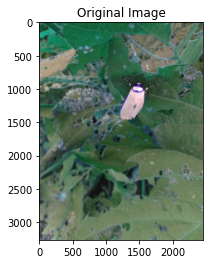

In [14]:
plt.imshow(img)
plt.title("Original Image")
plt.show

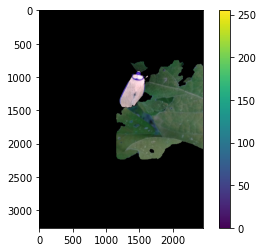

In [17]:
grabCut(img,rect)

In [39]:
img = cv2.imread('/content/00083IMG_00083_BURST20191001102824.jpg')
rect = (450,700,800,1431)

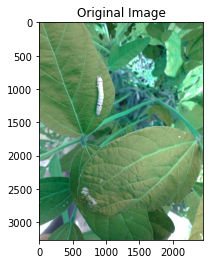

In [40]:
plt.imshow(img)
plt.title("Original Image")
plt.show()

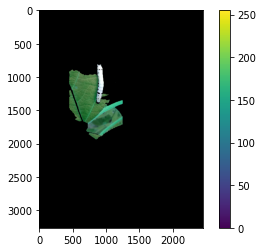

In [41]:
grabCut(img,rect)

In [42]:
img = cv2.imread('/content/coins-lot-collection-traditionalshoppe-original-imafw3hhvaqdbdvz.jpeg.webp')

<function matplotlib.pyplot.show>

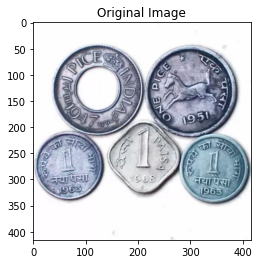

In [43]:
plt.imshow(img)
plt.title("Original Image")
plt.show

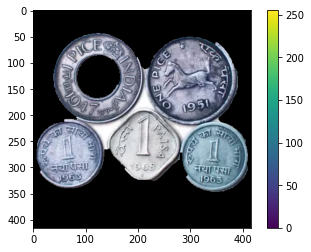

In [45]:
rect = (0,20,410,350)
grabCut(img,rect)